### ASSIGNMENT - 3 
### DATA VISUALIZATION
### ROHITH REDDY VANGALA (016762109)

question - 1: You’ll submit a Jupyter Notebook (.ipynb) for this assignment.

Create a Python Notebook and load the tips.cvs dataset
You can use any of the plotting libraries shown in class
Each of the libraries has ways to tweak the appearance of graphs.
Produce three different chart types (e.g. line, bar, pie, scatter)
Try to show interesting aspects of the data. This may require some minor data transformation such as sums or averages.
Include comments in your Notebook explaining what you are showing and what the graph tells us.



In [10]:
#solution -1 
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
tips_data=pd.read_csv("tips.csv")

In [12]:
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


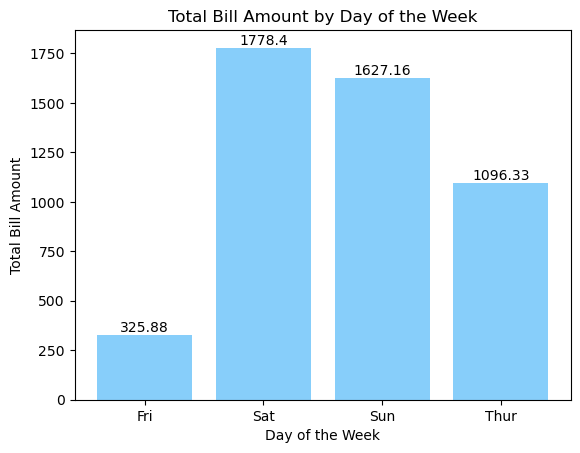

In [15]:
#This code uses the pandas groupby() function to group the tips_data DataFrame by the 'day' column.
#It then selects the 'total_bill' column from each group and computes the sum of the values in that column for each group
totalbill_week = tips_data.groupby('day')['total_bill'].sum()

#Created a bar plot of the total bill amount by day.
plt.bar(totalbill_week.index, totalbill_week.values,color=['#87CEFA'])
plt.title('Total Bill Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill Amount')

#The first argument i represents the index of the current bar.
#The second argument v represents the height of the current bar.
#The third argument str(round(v, 2)) is the label that is added to the bar. It is a string representation of the height of the bar (v), rounded to 2 decimal places using the round() function.
#The fourth argument ha='center' specifies the horizontal alignment of the label as centered with respect to the bar.
#The fifth argument va='bottom' specifies the vertical alignment of the label as being placed at the bottom of the bar.

for i, v in enumerate(totalbill_week.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.show()

This above chart shows the total bill amount by day of the week. We can see that Saturday has the highest total bill amount, followed by Sunday.

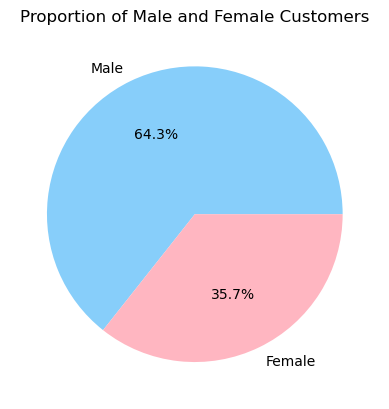

In [16]:
#Grouping the dataset by sex and computing the number of customers for each sex.
customers = tips_data['sex'].value_counts()

##defining colors variable to add customized color
color=['#87CEFA', '#FFB6C1']

#Creating a pie chart of the number of customers by sex.
plt.pie(customers.values, labels=customers.index,autopct='%1.1f%%',colors=color)
plt.title('Proportion of Male and Female Customers')
plt.show()

The chart shows that there are more male customers than female customers, with males accounting for 64.3% of the customers and females accounting for 35.7%. The chart also uses the autopct parameter to show the percentage of each category. The colors of the pie chart are set using the color parameter.

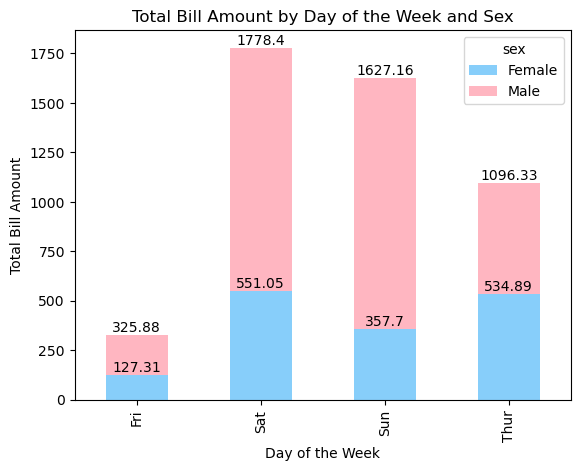

In [17]:
#Grouping the dataset by day of the week and sex and computing the total bill amount for each group
total_bill= tips_data.groupby(['day', 'sex'])['total_bill'].sum().unstack()

#defining colors variable to add customized color
colors=['#87CEFA', '#FFB6C1']

#Creating a stacked bar plot of the total bill amount by day of the week and sex.
stacked_barchart_tipsdata = total_bill.plot(kind='bar', stacked=True,color=colors)
plt.title('Total Bill Amount by Day of the Week and Sex')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill Amount')

#Adding value labels to the stacked bars
for i in stacked_barchart_tipsdata.containers:
    stacked_barchart_tipsdata.bar_label(i, label_type='edge')

plt.show()


This graph displays the overall bill amounts broken down by sex and day of the week. We can see that the overall bill amount is highest on Saturdays for both men and women, and on Fridays and Saturdays there is a greater difference in the total bill amount between men and women than on other days of the week.

No     151
Yes     93
Name: smoker, dtype: int64

 smoker
No     19.188278
Yes    20.756344
Name: total_bill, dtype: float64


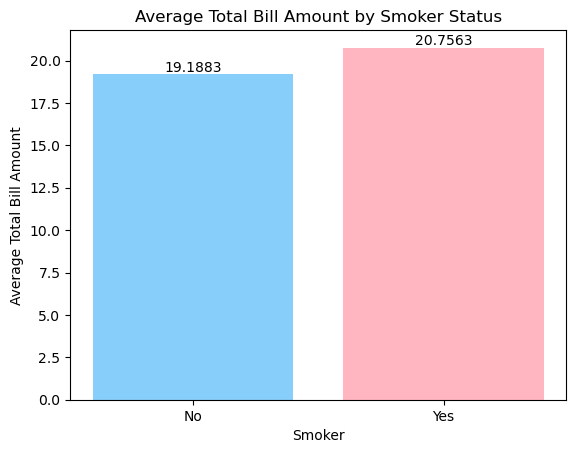

In [18]:
#Computing the average total bill amount for smokers and non-smokers.
smoker_counts = tips_data['smoker'].value_counts()
print(smoker_counts)
smoker_avg = tips_data.groupby('smoker')['total_bill'].mean()
print("\n",smoker_avg)


#By assigning the output of plt.subplots() to two variables
#we can then use ax to plot our data and customize the plot as desired.
fig, ax = plt.subplots()

#Creating a bar chart of the average total bill amount by smoker status
ax.bar(smoker_counts.index, smoker_avg, color=['#87CEFA', '#FFB6C1'])

ax.set_title('Average Total Bill Amount by Smoker Status')
ax.set_xlabel('Smoker')
ax.set_ylabel('Average Total Bill Amount')

#Adding value labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.show()


The bar chart shows a comparison of the average total bill amount between smokers and non-smokers. It is clear from the bar chart that smokers tend to have a slightly higher average total bill amount compared to non-smokers.